In [5]:
import matplotlib.pyplot as plt

In [6]:
def parse_file(filename, ext='.txt'):
    def extract_line(line):
        key_map = {
            'epoch': 'epoch',
            'loss': 'loss',
        }
        ans = {}
        items = line.split(', ')
        for i in items:
            k, v = i.split(': ')
            ans[key_map[k.strip()]] = float(v.strip())
        return ans
    ans = []
    with open(filename + ext) as f:
        for line in f.read().splitlines():
            ans.append(extract_line(line))
    return ans

In [7]:
def get_weighted(d):
    return [i['weighted'] for i in d]

def get_node_count(d):
    return [i['node_count'] for i in d]

def get_raw_move_count(d):
    return [i['node_count'] for i in d]

def get_filtered_move_count(d):
    ans = []
    for i in d:
        ans.append(i['node_count'] if i['weighted'] != -1 else -1)
    return ans

def get_epoch(d):
    return [i['epoch'] for i in d]
    
def get_loss(d):
    return [i['loss'] for i in d]

In [12]:
def get_loss_graph(game_size, game_goal):
    data_train = parse_file("size_{}_goal_{}_{}_error".format(game_size, game_goal, 'train'))
    data_test = parse_file("size_{}_goal_{}_{}_error".format(game_size, game_goal, 'test'))
    
    train_loss = get_loss(data_train)
    test_loss = get_loss(data_test)
    
    x = [i for i in range(len(train_loss))]

    plt.figure(figsize=(20,10))
    plt.plot(x, train_loss, label = "Train")
    plt.plot(x, test_loss, label = "Test")
    plt.suptitle('Training Loss Size:{}, Goal:{}'.format(game_size, game_goal))
    plt.ylabel('loss')
    plt.ylim(0, 1)
    plt.legend()
    plt.show()

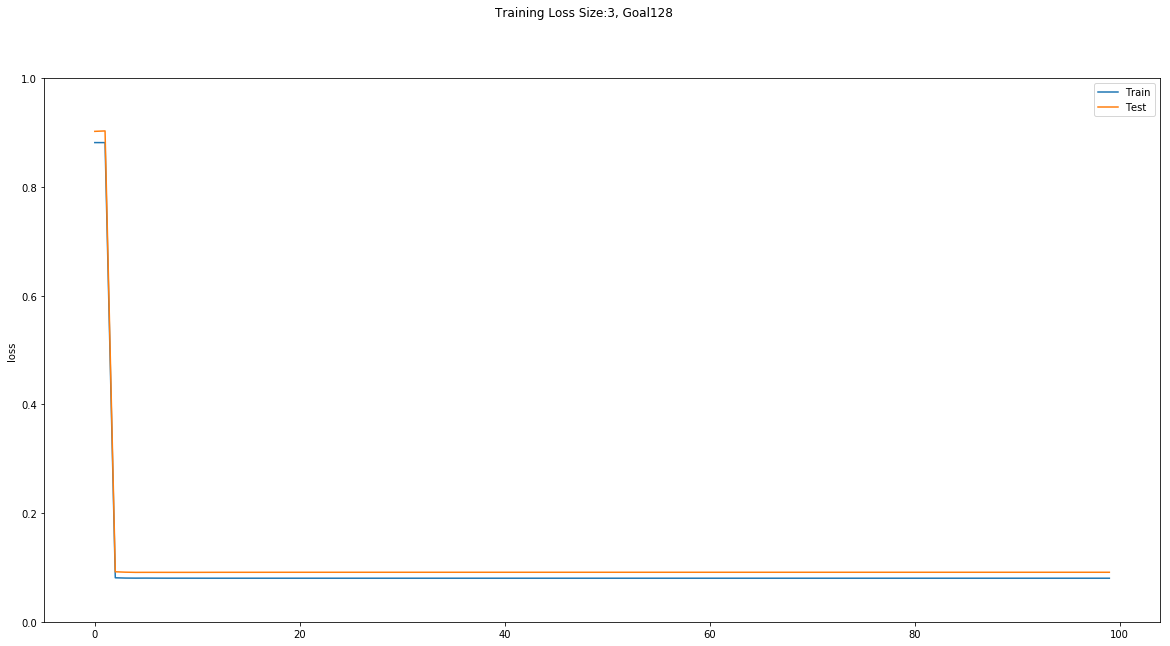

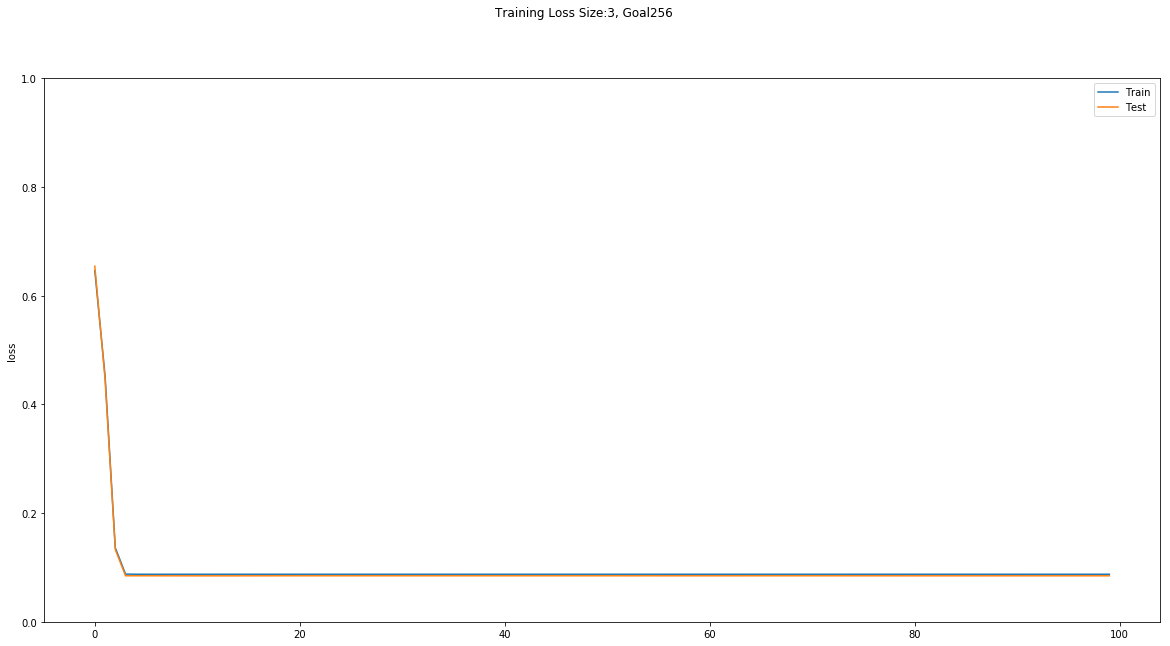

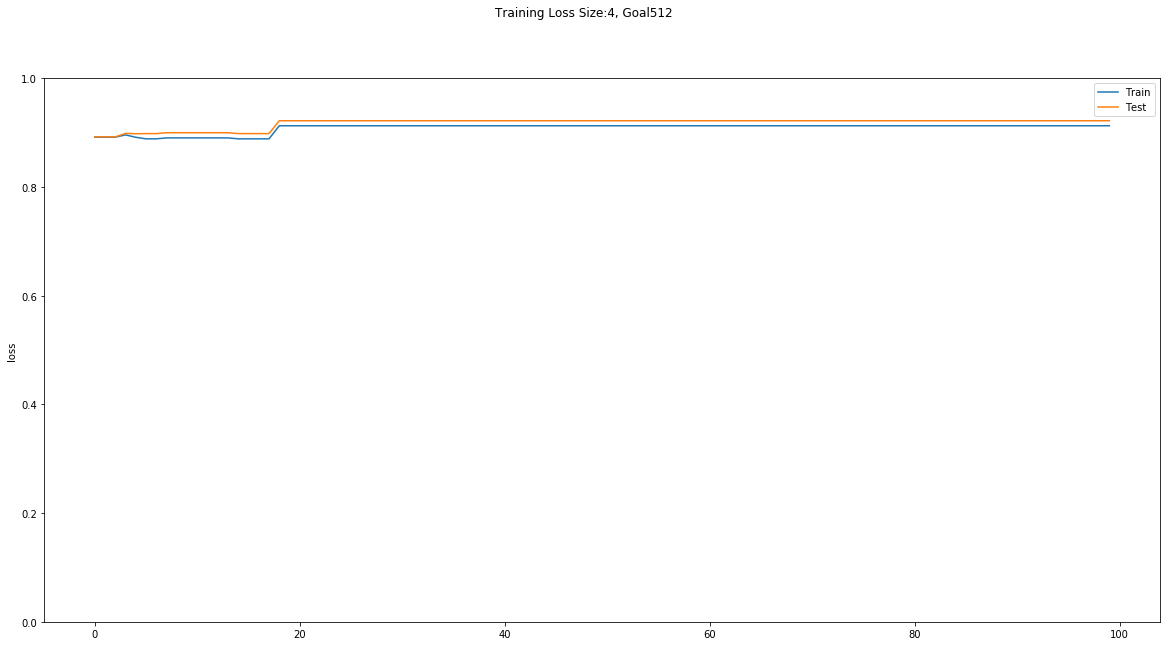

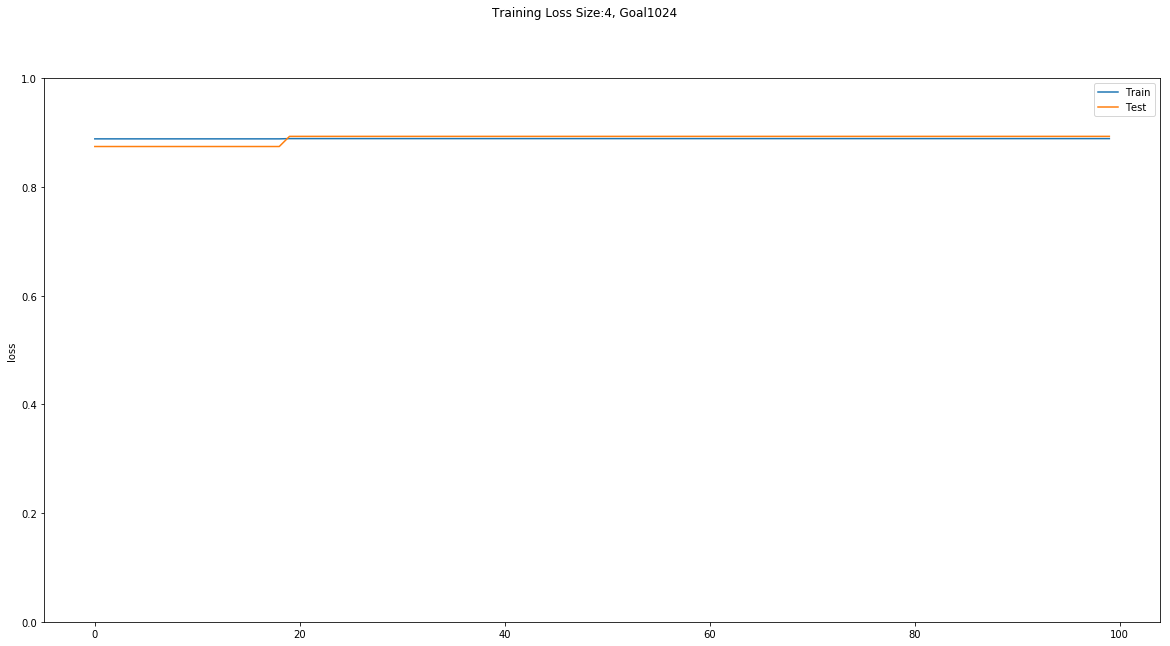

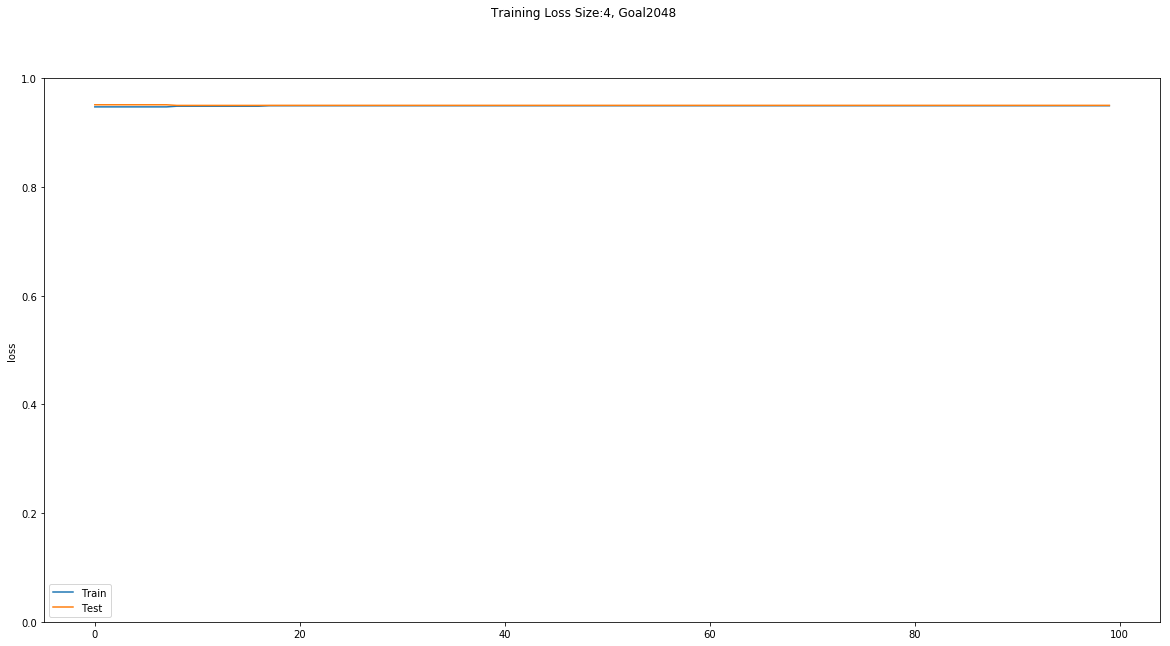

In [13]:
for size, goal in [(3,128),(3,256),(4,512),(4,1024),(4,2048)]:
    get_loss_graph(size, goal)